<a href="https://colab.research.google.com/github/duytruong204/Project/blob/main/Differentiable_Binarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import các thư viện

In [1]:
!pip install keras-resnet
!pip install pyclipper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=65d6f86426ca1beeb8a37dad73269a8aa3587ba0c9d5f80e831f37a60acff485
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 604 kB 9.9 MB/s 


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/AI contest/DifferentiableBinarization-master')

In [3]:
from model import dbnet
from inference import resize_image, polygons_from_bitmap
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from keras import callbacks
from keras import optimizers
import generator
from tensorflow import keras

In [4]:
ModelTrain, Model = dbnet()
Model.load_weights('/content/drive/MyDrive/AI contest/mode.h5')

In [5]:
image_path = "/content/drive/MyDrive/AI contest/1011.jpg"
image = cv2.imread(image_path)
src_image = image.copy()
h, w = image.shape[:2]
image = resize_image(image)
image = image.astype(np.float32)
mean = np.array([103.939, 116.779, 123.68])
image -= mean
image_input = np.expand_dims(image, axis=0)
p = Model.predict(image_input)[0]
bitmap = p > 0.3
boxes, scores = polygons_from_bitmap(p, bitmap, w, h, box_thresh=0.5)
for box in boxes:
    cv2.drawContours(src_image, [np.array(box)], -1, (0, 255, 0), 2)

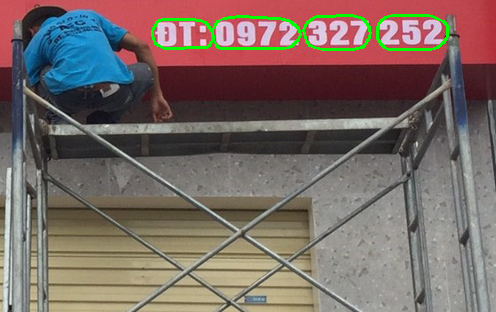

In [6]:
cv2_imshow(src_image)

Generate data